In [1]:
library(dplyr)
library(ggplot2)
library(ggcharts)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggcharts' was built under R version 3.6.3"

## Load Data

In [2]:
url <- "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-29-2021.csv"
df <- read.csv(url, header = TRUE)
df

FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
NA,,,Afghanistan,2021-06-30 04:21:41,33.93911,67.70995,117158,4794,70016,42348,Afghanistan,300.95811,4.0919101
NA,,,Albania,2021-06-30 04:21:41,41.15330,20.16830,132514,2456,130002,56,Albania,4604.69803,1.8533891
NA,,,Algeria,2021-06-30 04:21:41,28.03390,1.65960,139229,3708,96815,38706,Algeria,317.50442,2.6632383
NA,,,Andorra,2021-06-30 04:21:41,42.50630,1.52180,13900,127,13717,56,Andorra,17990.03430,0.9136691
NA,,,Angola,2021-06-30 04:21:41,-11.20270,17.87390,38682,894,33079,4709,Angola,117.69514,2.3111525
NA,,,Antigua and Barbuda,2021-06-30 04:21:41,17.06080,-61.79640,1263,42,1221,0,Antigua and Barbuda,1289.72306,3.3254157
NA,,,Argentina,2021-06-30 04:21:41,-38.41610,-63.61670,4447701,93668,4062245,291788,Argentina,9840.96589,2.1059869
NA,,,Armenia,2021-06-30 04:21:41,40.06910,45.03820,224967,4514,216718,3735,Armenia,7591.94178,2.0065165
NA,,Australian Capital Territory,Australia,2021-06-30 04:21:41,-35.47350,149.01240,124,3,121,0,"Australian Capital Territory, Australia",28.96520,2.4193548
NA,,New South Wales,Australia,2021-06-30 04:21:41,-33.86880,151.20930,5826,54,0,5772,"New South Wales, Australia",71.76644,0.9268795


In [3]:
str(df)

'data.frame':	3987 obs. of  14 variables:
 $ FIPS               : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Admin2             : Factor w/ 1927 levels "","Abbeville",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Province_State     : Factor w/ 578 levels "","Abruzzo","Acre",..: 1 1 1 1 1 1 1 1 43 346 ...
 $ Country_Region     : Factor w/ 195 levels "Afghanistan",..: 1 2 3 4 5 6 7 8 9 9 ...
 $ Last_Update        : Factor w/ 7 levels "2020-08-04 02:27:56",..: 7 7 7 7 7 7 7 7 7 7 ...
 $ Lat                : num  33.9 41.2 28 42.5 -11.2 ...
 $ Long_              : num  67.71 20.17 1.66 1.52 17.87 ...
 $ Confirmed          : int  117158 132514 139229 13900 38682 1263 4447701 224967 124 5826 ...
 $ Deaths             : int  4794 2456 3708 127 894 42 93668 4514 3 54 ...
 $ Recovered          : int  70016 130002 96815 13717 33079 1221 4062245 216718 121 0 ...
 $ Active             : int  42348 56 38706 56 4709 0 291788 3735 0 5772 ...
 $ Combined_Key       : Factor w/ 3987 levels "Abbeville, South Carolina, U

In [4]:
summary(df)

      FIPS              Admin2      Province_State  Country_Region
 Min.   :   66             : 716   Texas   : 255   US      :3277  
 1st Qu.:19050   Unassigned:  51           : 174   Russia  :  83  
 Median :30068   Washington:  30   Georgia : 161   Japan   :  49  
 Mean   :32401   Jefferson :  26   Virginia: 134   India   :  37  
 3rd Qu.:47041   Franklin  :  25   Kentucky: 121   China   :  34  
 Max.   :99999   Jackson   :  24   Missouri: 117   Colombia:  34  
 NA's   :721     (Other)   :3115   (Other) :3025   (Other) : 473  
              Last_Update        Lat             Long_        
 2020-08-04 02:27:56:   2   Min.   :-52.37   Min.   :-178.12  
 2020-08-07 22:34:20:   1   1st Qu.: 33.27   1st Qu.: -96.62  
 2020-12-21 13:27:30:   5   Median : 37.94   Median : -86.85  
 2021-01-24 23:22:19:   1   Mean   : 35.95   Mean   : -71.98  
 2021-04-25 23:20:49:   1   3rd Qu.: 42.22   3rd Qu.: -77.49  
 2021-06-29 23:21:50:   1   Max.   : 71.71   Max.   : 178.06  
 2021-06-30 04:21:41:39

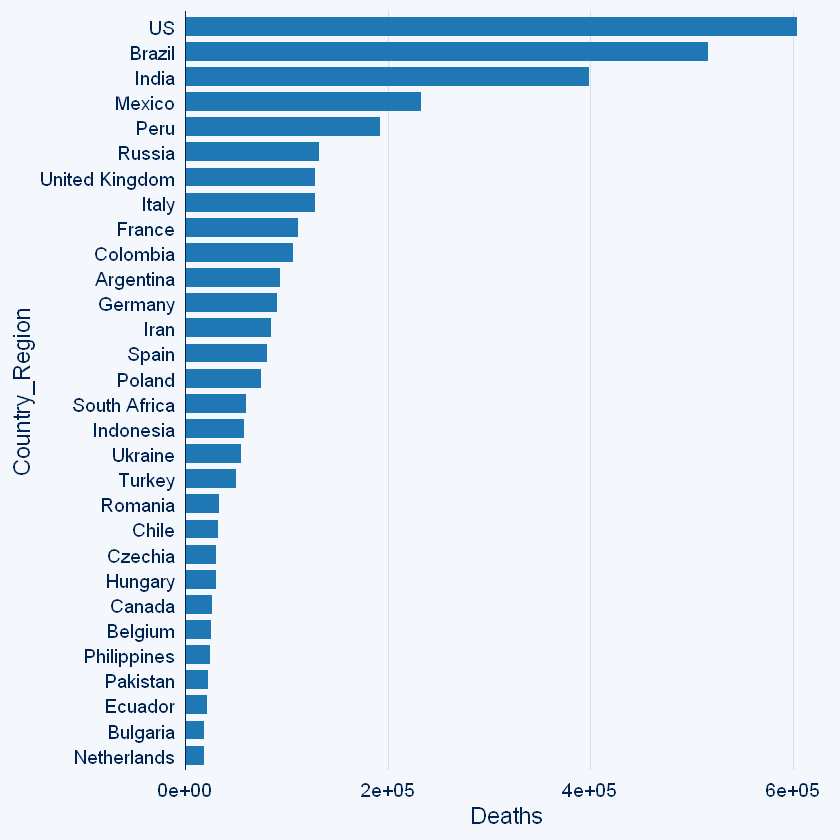

In [5]:
#Nhom du lieu
country <- df %>% group_by(Country_Region)
country <- country %>% summarise(Deaths = sum(Deaths))
#Sort
country <- country[order(-country$Deaths),]
#BarChart
country %>%
  bar_chart(x = Country_Region, y = Deaths, top_n = 30)